In [1]:
## Load all libraries and setup the synthetic problem
from library.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
from SimPEG import PF, Utils, Mesh, Maps
from SimPEG import Utils
from SimPEG.Utils import mkvc
import SimPEG.PF as PF
import scipy as sp
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load data and topo and build default model
workDir = ''
fName = 'DataGrid.tiff'

dataGrid = DataIO.loadGeoTiffFile(workDir+fName, plotIt=True)

<Figure size 800x800 with 2 Axes>

# X.X.	Depth estimation from Tilt angle#



<!-- <img src="./images/SearchQuestII.png"> -->


## Compute tilt angle


In [2]:
filters = MathUtils.gridFilter(dx=dataGrid.dx, dy=dataGrid.dy, grid=dataGrid.values)
tilt = filters.tiltAngle

## Get 0 contour
 

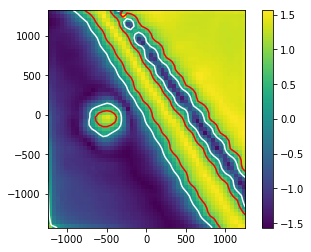

In [3]:
xLoc = np.asarray(range(dataGrid.nx))*dataGrid.dx+dataGrid.limits[0]
yLoc = np.asarray(range(dataGrid.ny))*dataGrid.dy+dataGrid.limits[2]
X, Y = np.meshgrid(xLoc, yLoc)

axs = plt.subplot()
plt.imshow(tilt, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower')
plt.colorbar()
C_0 = plt.contour(X,Y,tilt, levels=[0], colors='w')
C_45 = plt.contour(X,Y,tilt, levels=[np.pi/4.], colors='r')
axs.set_aspect('equal')

In [4]:
from scipy.spatial import cKDTree

# Get zero contour nodes
xy0 = np.vstack(C_0.allsegs[0])

# Get 45 contour nodes
xy45 = np.vstack(C_45.allsegs[0])

# Create ckDtree for shortest distance
tree = cKDTree(xy45)

# Query two closest points to each nodes of zero contour
d, indx = tree.query(xy0, k = 2)

# Compute shortest distance between pair of points
dist = np.abs(
    (xy45[indx[:,1],1] - xy45[indx[:,0],1])*xy0[:,0] - 
    (xy45[indx[:,1],0] - xy45[indx[:,0],0])*xy0[:,1] + 
    xy45[indx[:,1],0] * xy45[indx[:,0],1] - 
    xy45[indx[:,1],1] * xy45[indx[:,0],0]) / np.sqrt(
    (xy45[indx[:,1],0] - xy45[indx[:,0],0])**2. + 
    (xy45[indx[:,1],1] - xy45[indx[:,0],1])**2.
    )



C:\Users\DominiqueFournier\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


87.38258000019063

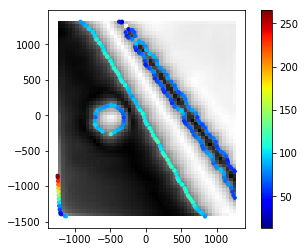

In [5]:
axs = plt.subplot()
plt.imshow(tilt, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower', cmap='gray')

plt.scatter(xy0[:,0],xy0[:,1],10, c=dist, cmap='jet')
plt.colorbar()
np.mean(dist[~np.isnan(dist)])